In [1]:
import numpy as np
import cv2
import glob
import random

In [2]:
# by using google colaboratory ( online GPU) to train the model of (Tiger detection) and get the
# tiger.weights that used to detect any tiger available in the image 
# can be trained to detect any thing acording to the data set feeded to the system ( one or more)
# to train the model first manualy optained the coordinates of item needed to train the model to detect by
# using labelImg.exe and the uploaded to google drive and connect it to google colaboratory training code


net = cv2.dnn.readNet("tiger.weights" , "yolov3_testing_custom.cfg")

tiger_images = glob.glob(r"tigers//*.jpg") # to load all images in the folder
random.shuffle(tiger_images)
classes = ['Tiger'] # the item needed to detect is Tiger

layer_names = net.getLayerNames()
output_layers_names = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
 
    
for image in tiger_images:     
    img = cv2.imread(image)
    height , width , _ = img.shape

 
    blob = cv2.dnn.blobFromImage(img , 1/255,(416,416), swapRB=True,crop=False)

    
    net.setInput(blob)
    output_layers = net.forward(output_layers_names)

    boxes =[]
    confidents=[]
    class_ids=[]

    for output in output_layers:       # for each type of detection ' output'
        for detection in output:       # for each elements in one type
            score=detection[5:]
            class_id = np.argmax(score) #getting location of max probability ratio for detection item for each
            confident =score[class_id] # getting the max probability 

            if confident > 0.5 :
                # taking the location of detect for each single detection
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width ) 
                h = int(detection[3] * height)

                x = int(center_x - w/2)
                y = int(center_y - h/2)

                # saving the details for each detection 
                boxes.append([x,y,w,h])
                confidents.append(float (confident))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes ,confidents , 0.5 , 0.4) 
    # to prevent detecting same element more than one time


    font = cv2.FONT_HERSHEY_PLAIN # setting the font to be used
     

    for  i in indexes.flatten(): # explained under the main code block
        x,y,w,h = boxes[i]
        
        label = str(classes[class_ids[i]])
        confidence = str(round(confidents[i] , 2)) # to used in (putText ) it should becom string 

        cv2.rectangle(img , (x,y), (x+w , y+h) , (0,255,0) , 2) # drawing the rectangle for each detected element
        cv2.putText(img , label + ' ' + confidence , (x , y+20 ) , font , 2, (255,0,0) , 2)

        print(label + ' '+ confidence) # printing the detection details

    cv2.imshow('image' , img)
    if cv2.waitKey(0) & 0xFF:
        break
cv2.destroyAllWindows()
    

Tiger 1.0
Tiger 1.0
Tiger 1.0
Tiger 0.99
Tiger 1.0


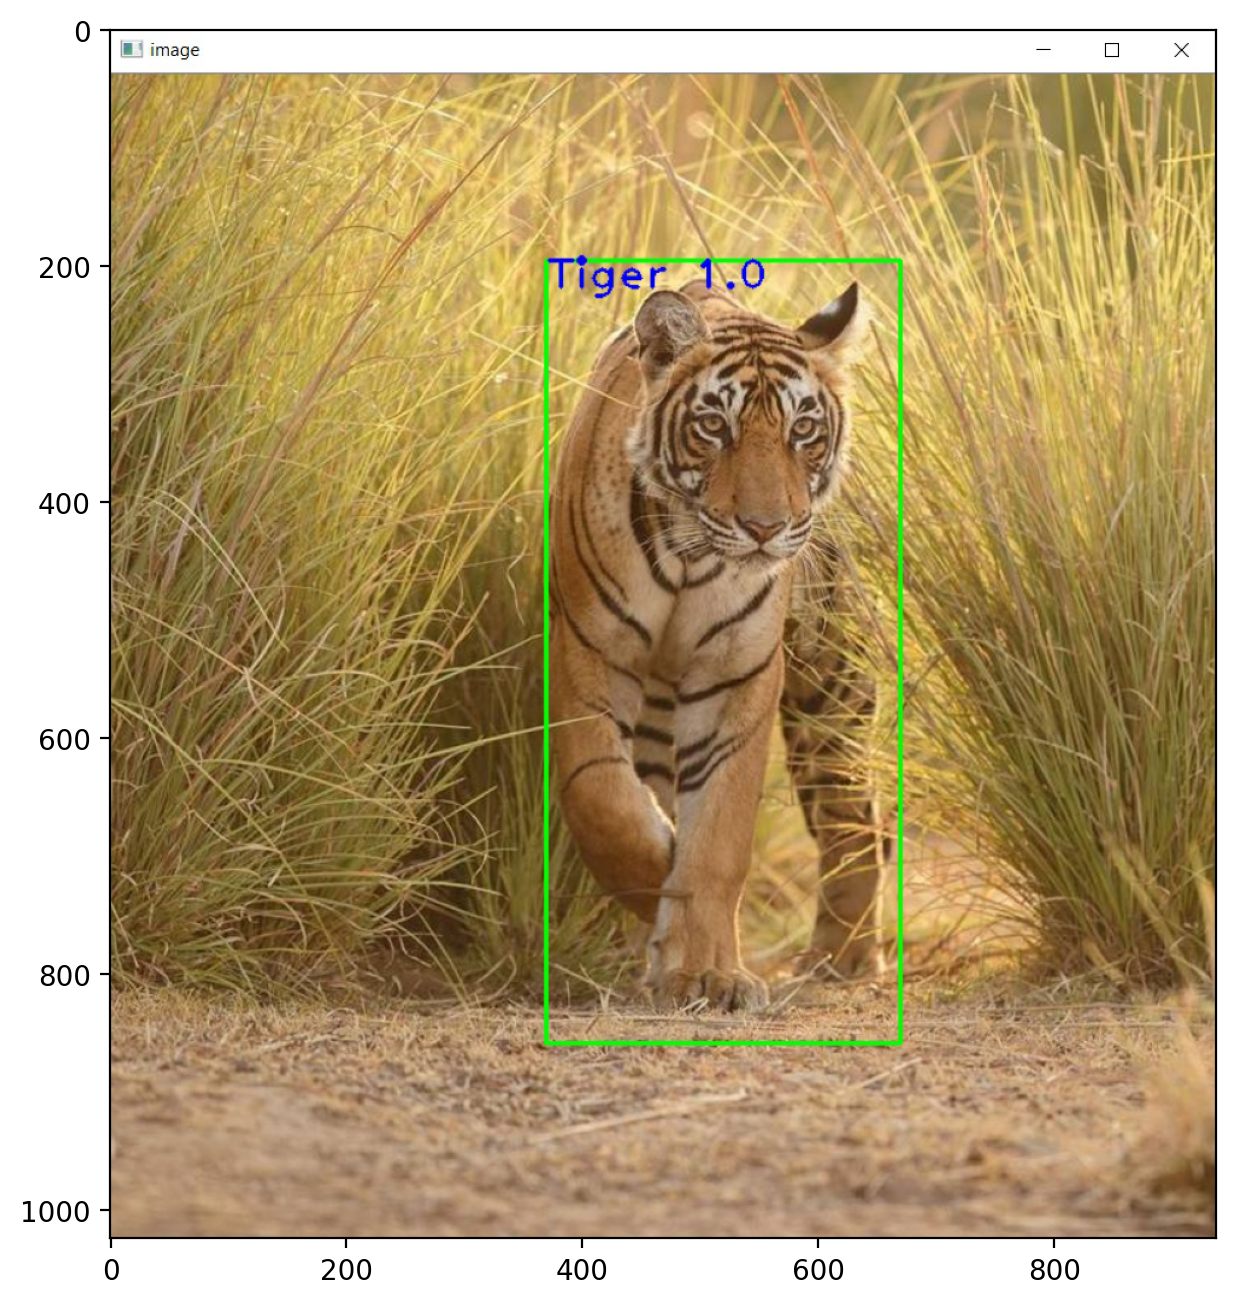

In [3]:
# some of the results : 
import matplotlib.pyplot as plt
result = cv2.cvtColor( cv2.imread('t1.jpg') , cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8), dpi =200)
plt.imshow(result);

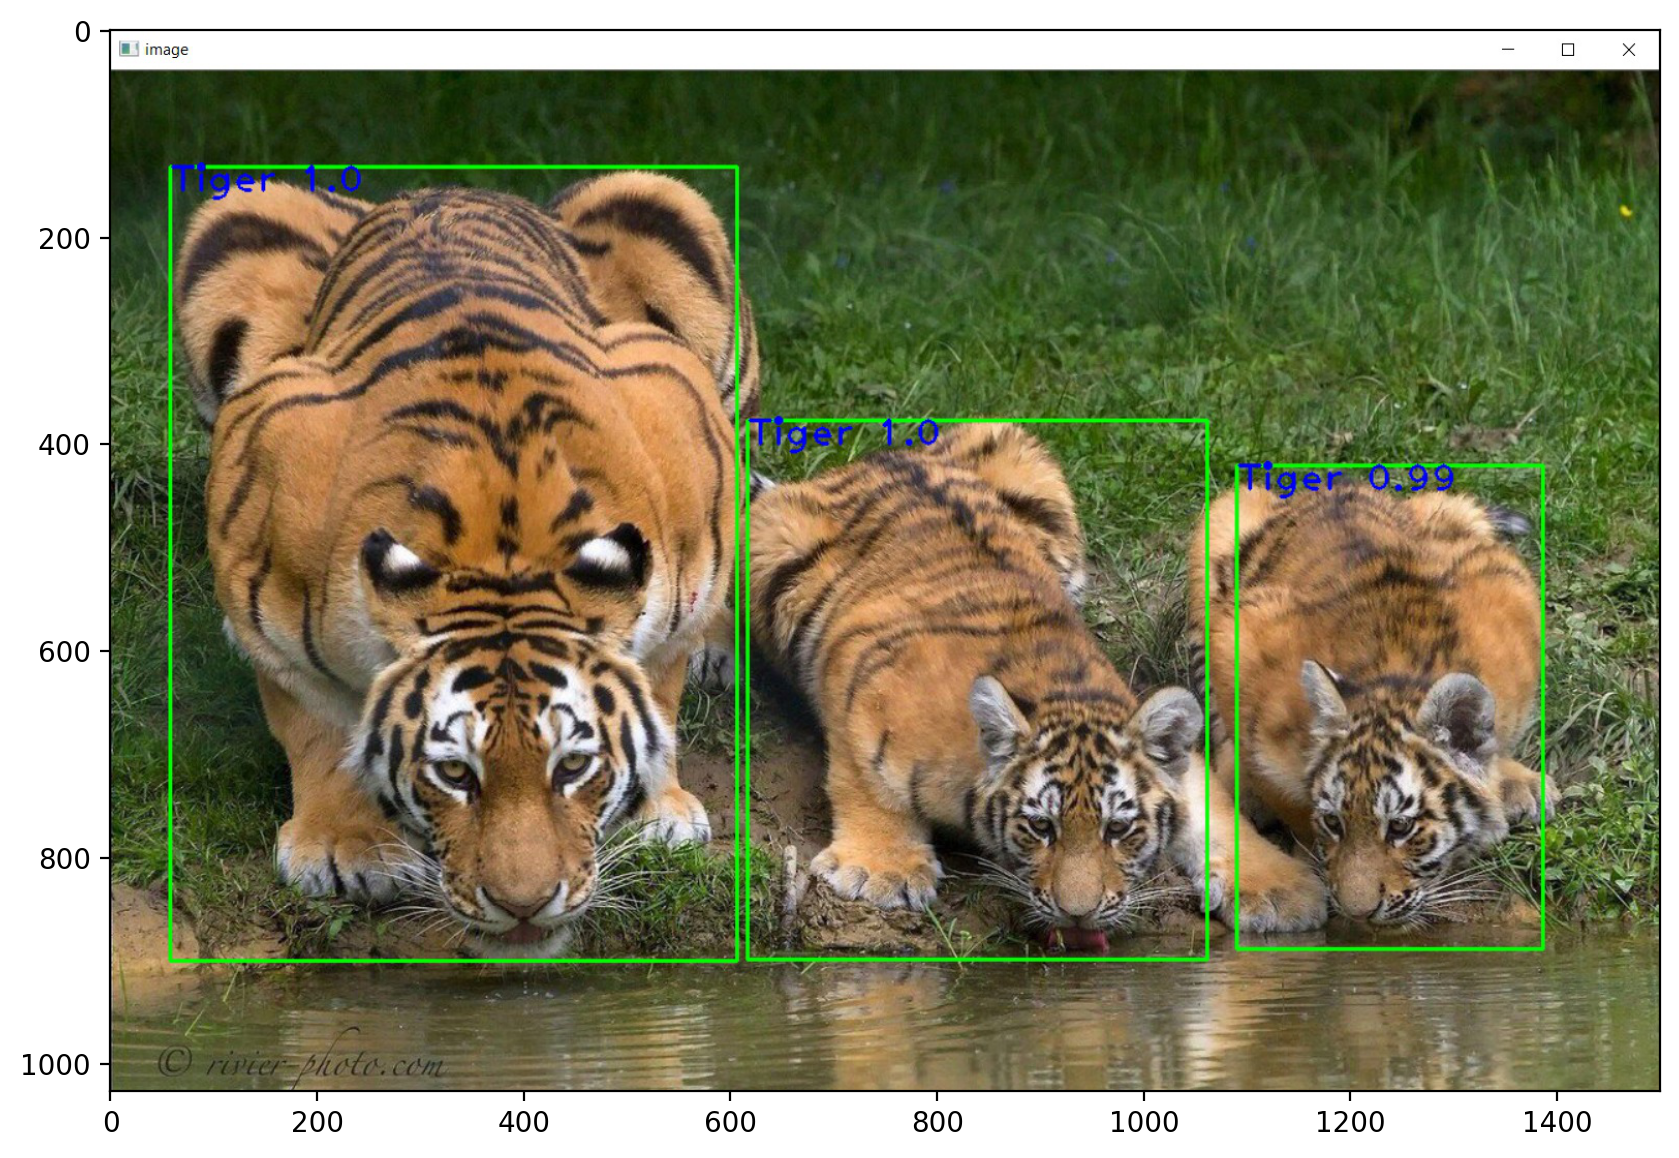

In [4]:
result = cv2.cvtColor( cv2.imread('t2.jpg') , cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8), dpi =200)
plt.imshow(result);

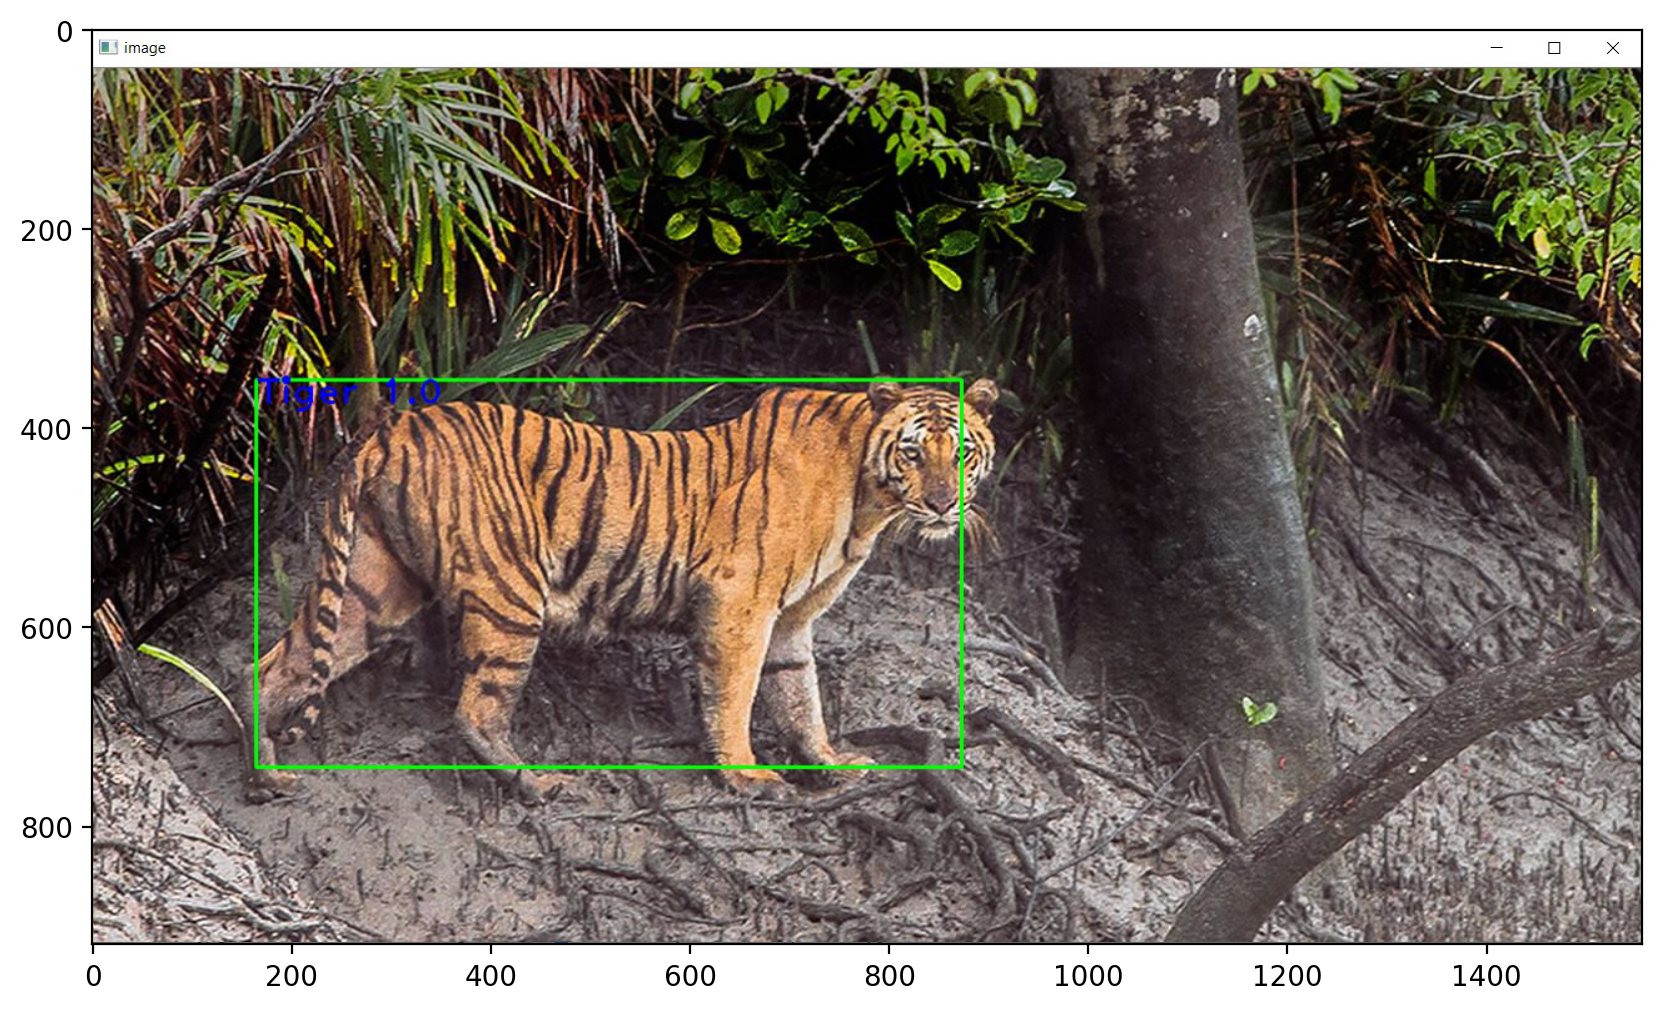

In [5]:
result = cv2.cvtColor( cv2.imread('t3.jpg') , cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8), dpi =200)
plt.imshow(result);